## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## Check hardware resource
!nvidia-smi.exe

'nvidia-smi.exe' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os, keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x/128-1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080      
_______

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/100





50000/50000 [==============================] - 83s 2ms/step - loss: 1.7932 - acc: 0.3604 - val_loss: 1.6251 - val_acc: 0.4189
Epoch 2/100
50000/50000 [==============================] - 70s 1ms/step - loss: 1.5336 - acc: 0.4583 - val_loss: 1.4829 - val_acc: 0.4745
Epoch 3/100
50000/50000 [==============================] - 68s 1ms/step - loss: 1.3967 - acc: 0.5095 - val_loss: 1.4306 - val_acc: 0.5045
Epoch 4/100
50000/50000 [==============================] - 68s 1ms/step - loss: 1.2962 - acc: 0.5445 - val_loss: 1.4059 - val_acc: 0.5043
Epoch 5/100
50000/50000 [==============================] - 68s 1ms/step - loss: 1.2039 - acc: 0.5763 - val_loss: 1.3505 - val_acc: 0.5311
Epoch 6/100
50000/50000 [==============================] - 67s 1ms/step - loss: 1.1211 - acc: 0.6072 - val_loss: 1.3792 - val_acc: 0.5261
Epoch 7/100
50000/50

50000/50000 [==============================] - 67s 1ms/step - loss: 0.0995 - acc: 0.9679 - val_loss: 3.2725 - val_acc: 0.5432
Epoch 46/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0881 - acc: 0.9715 - val_loss: 3.2718 - val_acc: 0.5370
Epoch 47/100
50000/50000 [==============================] - 72s 1ms/step - loss: 0.0983 - acc: 0.9686 - val_loss: 3.4094 - val_acc: 0.5346
Epoch 48/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0987 - acc: 0.9679 - val_loss: 3.2953 - val_acc: 0.5469
Epoch 49/100
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0910 - acc: 0.9704 - val_loss: 3.2465 - val_acc: 0.5513
Epoch 50/100
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0998 - acc: 0.9683 - val_loss: 3.3751 - val_acc: 0.5393
Epoch 51/100
50000/50000 [==============================] - 37s 735us/step - loss: 0.0758 - acc: 0.9752 - val_loss: 3.4689 - val_acc: 0.5399
Epoch 52/100
50000/50000 [============

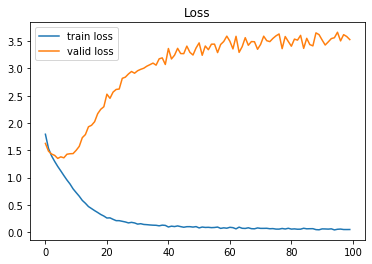

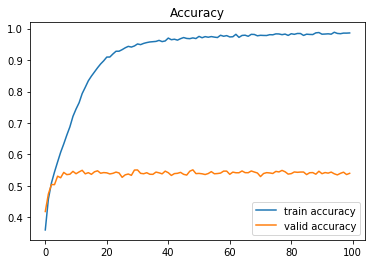

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()